In [160]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') # For Windows

In [161]:
import csv

f = open('../data/weather.csv', encoding='euc-kr')
data = csv.reader(f)
header = next(data)
data = list(data)
f.close()

print(len(data))
print(header)
print()

for row in data[:3]:
    print(row)

35651
['일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']

['1921-01-01', '2.3', '5.2', '-0.4']
['1921-01-02', '-3.4', '1.5', '-5.8']
['1921-01-03', '-6.5', '-2.7', '-9.5']


In [162]:
max_temp = -999
max_data = ''

for row in data:
    if row[2] != '' :
        if float(row[2]) > max_temp :
            max_temp = float(row[2])
            max_data = row[0]

print(f'기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 {max_data} 로 {max_temp} 도이다.')

기상 관측 이래 서울의 최고 기온이 가장 높았던 날은 2018-08-01 로 39.6 도이다.


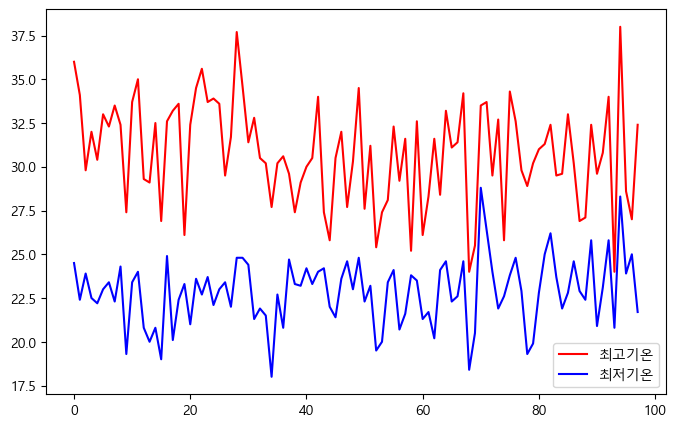

In [163]:
high = []
low = []

for row in data:
    if row[2] != '' and '08-15' in row[0]:
        high.append(float(row[2]))
        low.append(float(row[3]))
plt.figure(figsize=[8,5])
plt.plot(high, color='r', label='최고기온')
plt.plot(low, color='b', label='최저기온')
plt.legend(loc='lower right')
plt.show()    

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


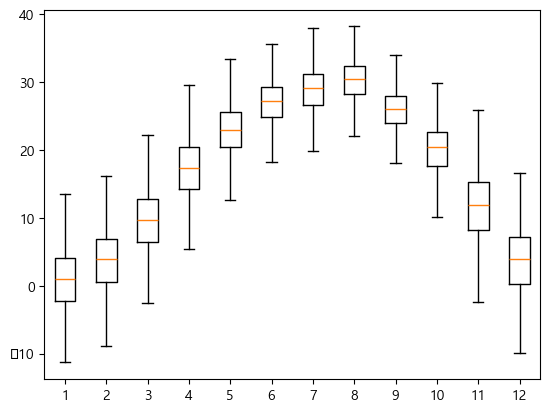

In [164]:
month = [[] for i in range(12)]

for row in data:
    if row[2] != '':
        month[int(row[0].split('-')[1])-1].append(float(row[2]))

plt.boxplot(month, showfliers=False)
plt.show()

In [165]:
import pandas as pd
data = pd.read_csv("../data/train.csv", encoding='euc-kr')

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
import csv

f = open('../data/train.csv', encoding= 'euc-kr')
data = csv.reader(f)
header = next(data)
data = list(data)
f.close

<function TextIOWrapper.close()>

In [167]:
SBG = {'생존 남성' : 0, '사망 남성' : 0, '생존 여성' : 0, '사망 여성' : 0}

for row in data:
    if row[4] == 'male':
        if row[1] == '0':
            SBG['사망 남성'] += 1
        elif row[1] == '1':
            SBG['생존 남성'] += 1
    else:
        if row[1] == '0':
            SBG['사망 여성'] += 1
        elif row[1] == '1':
            SBG['생존 여성'] += 1

print(SBG)

{'생존 남성': 109, '사망 남성': 468, '생존 여성': 233, '사망 여성': 81}


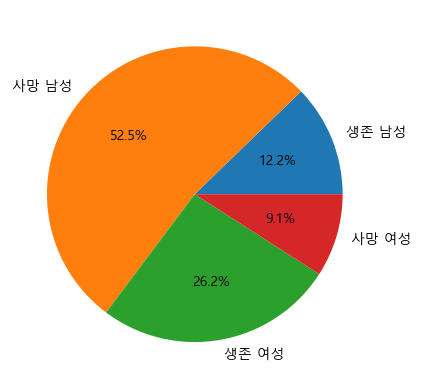

In [168]:
plt.pie(SBG.values(), labels=SBG.keys(), autopct="%.1f%%")
plt.show()

In [169]:
Ticket = ['1st Sur', '1st Dead', '2nd Sur', '2nd Dead', '3rd Sur', '3rd Dead']
corre = [0,0,0,0,0,0]

for row in data:
    if row[2]=='1':
        if row[1] == '1':
            corre[0]+=1
        else:
            corre[1]+=1
    elif row[2] == '2':
        if row[1] == '1':
            corre[2] +=1
        else:
            corre[3] +=1
    else:
        if row[1] == '1':
            corre[4]+=1
        else:
            corre[5]+=1
            
print(corre)

[136, 80, 87, 97, 119, 372]


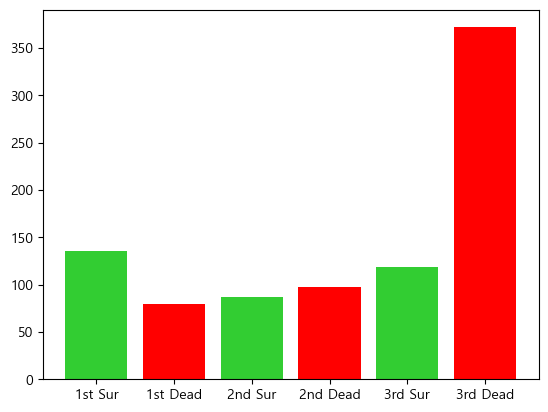

In [174]:
plt.bar(Ticket, corre, color=['limegreen', 'r'])
plt.show()